In [145]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Ergodicity of a spin array

As you saw in class, one way of describing ergodicity is **"the ability of a system to reach every possible configuration when given enough time"**.

In this exercise you will simulate a basic 1D spin array and will check if the system is ergodic or not.


## Part 1 - Ensemble Average

### Task 1.1 - generate a 1D spin array of size $l$

Hint: Use np.random.choice() for the convenience

In [159]:
def generate_spin_array(length):
    '''
    Description:
    This function gets an integer which corresponds to length of the array we want to generate.
    Then the function generates a spin array (spin up = +1/2, spin down = -1/2) of the requested length.
    The spin array that the function generates should be random.

    Inputs:
    length - the length of the array 
    
    Outputs: 
    spin_array - the array of the spins

    Example:
    input: length = 5
    output: spin_array = [-0.5, 0.5, 0.5, -0.5, 0.5]   (The out put may vary as the spins generated are random)
    '''
    spins = [-1/2,1/2]
    spin_array = np.random.choice(spins, length)
    return spin_array

length = 5
spins_array = generate_spin_array(length)
print(spins_array)

[-0.5  0.5  0.5 -0.5 -0.5]


### Task 1.2 - generate $N$ 1d arrays of size $l$ and store them in a Matrix

Hint: use the function created in task 1.1.

In [160]:
def generate_N_1d_arrays(N, length):
    '''
    Description:
    This function gets 2 number which corresponds to length of the array we want to generate and the number of arrays.
    Then the function generates N spin arrays of a certain length and stores them in a matrix.
    As before, the spin arrays that the function generates should be random.

    Inputs:
    N - number of arrays to generate
    length - the length of the array 
    
    Outputs: 
    matrix - a matrix that contains all the arrays. Each row is a different array. 
    ***For convenience return the matrix as a numpy array****

    Example:
    input: length = 5
           N = 3 
    output: matrix = [[-0.5  0.5 -0.5 -0.5  0.5]
                      [-0.5 -0.5 -0.5  0.5 -0.5]
                      [-0.5 -0.5  0.5 -0.5 -0.5]]
    '''
    matrix = []
    for i in range(N):
        spins_array = generate_spin_array(length)
        matrix.append(spins_array)
    return np.array(matrix)

length = 6
N = 3
matrix = generate_N_1d_arrays(N, length)
print(matrix)

[[ 0.5 -0.5 -0.5  0.5  0.5  0.5]
 [ 0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [ 0.5  0.5  0.5 -0.5  0.5 -0.5]]


### Task 1.3 - calculate the magnetization of a 1D array

In [ ]:
def calculate_total_magnetization(spins_array):
    '''
    Description:
    This function gets a spins array and calculates the magnetization (sum of all spins).

    Inputs:
    spins_array = 1D array of spins like the one generated in task 1.1
    
    Outputs: 
    magnetization - the magnetization of the array

    Example:
    input: spins_array = [-0.5  0.5 -0.5 -0.5  0.5]
    output: magnetization = -0.5
    '''
    magnetization = np.sum(spins_array)
    return magnetization

length = 6
spins_array = generate_spin_array(length)
magnetization = calculate_total_magnetization(spins_array)
print(magnetization)

3.0


### Task 1.4 - calculate the average magnetization of $N$ 1D spin arrays

In [ ]:
def calculate_average_magnetization(spins_matrix):
    '''
    Description:
    This function gets a spins matrix (N arrays of length l) and calculates the average magnetization. (average magnetization per array).

    Inputs:
    spins_array = 2D array of spins like the one generated in task 1.2
    
    Outputs: 
    average magnetization - the average magnetization per array

    Example:
    input: spins_matrix = [[ 0.5  0.5 -0.5 -0.5  0.5  0.5]
                           [-0.5 -0.5 -0.5 -0.5  0.5  0.5]
                           [-0.5 -0.5 -0.5  0.5 -0.5 -0.5]]
    output: average_magnetization = -0.333
    '''
    magnetizations = np.sum(spins_matrix, axis=1)
    average_magnetization = np.mean(magnetizations)
    return average_magnetization

length = 6
N = 100
spins_matrix = generate_N_1d_arrays(N, length)
average_magnetization = calculate_average_magnetization(spins_matrix)
print(average_magnetization)

0.08


### Task 1.5 - plot the average magnetization as a function of N

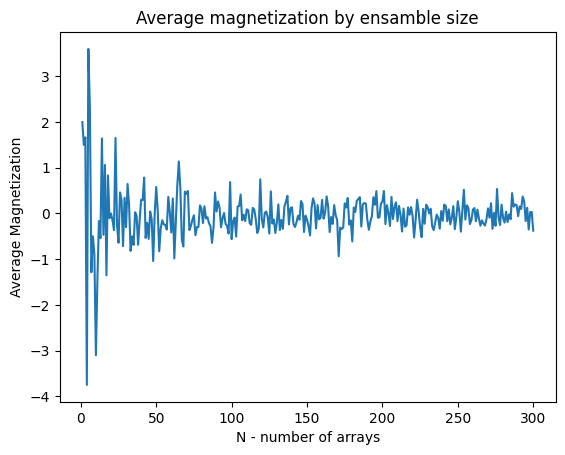

In [163]:
length = 50
N_min = 1
N_max = 300
N_range = np.linspace(N_min, N_max, N_max)
magnetization_dict = {}
for n in N_range:
    matrix = generate_N_1d_arrays(int(n), length)
    magnetization = calculate_average_magnetization(matrix)
    magnetization_dict[n] = magnetization
plt.plot(magnetization_dict.keys(), magnetization_dict.values())
plt.title('Average magnetization by ensamble size')
plt.xlabel('N - number of arrays')
plt.ylabel('Average Magnetization')
plt.show()

### Question - Explain what you see in the plot:

## Part 2 - Time Average

### Task 2.1 - generate a spin up 1D array of length $l$

In [ ]:
def generate_spin_up_array(length):
    return np.array([1]*length)

print(generate_spin_up_array(5))

[1 1 1 1 1]


In [251]:
def flip_spin_randomly(array):
    array_copy = np.copy(array)
    index = np.random.choice(range(len(array_copy)), 1)[0]
    array_copy[index] = -1*array_copy[index]
    return(array_copy)

spins_array = generate_spin_array(5)
flipped_array = flip_spin_randomly(spins_array)
print(spins_array , flipped_array)

[ 0.5  0.5  0.5 -0.5  0.5] [ 0.5  0.5  0.5 -0.5 -0.5]
